In [49]:
# coding: utf-8

# In[17]:


from datetime import timedelta, datetime

import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
# importa a biblioteca plotly.graph_objs para criação do gráfico interativo
import plotly.graph_objs as go

# import wget
# import os

In [7]:
plt.style.use('seaborn')

# # delete a old file
# # os.remove("./JHU_COVID-19.csv")
# os.remove("./full_data.csv")
# # download the new datasheet form JH
# # url ="https://s3-us-west-1.amazonaws.com/starschema.covid/JHU_COVID-19.csv"
# url ="https://covid.ourworldindata.org/data/ecdc/full_data.csv"
# output_directory = "."
# filename = wget.download(url, out=output_directory)


# read a csv to DataFrame with pandas
data = pd.read_csv("https://covid.ourworldindata.org/data/ecdc/full_data.csv")

# data from 🔅 Worldometers:
# Cases =  30425. #❗️(103 novos)
# Deaths = 1924 #❗️(11 novos) 😔
# Recupered = 4390
# txfa = Deaths/Cases
# txre = Recupered/Cases

total_data = data.copy()

data.index = pd.to_datetime(data.date)
# sel data form Brazil
ctry = data[data["location"] == 'Brazil']
tested = ctry.copy()

# create a arrays for curve fit parameters of a exponential equation
# xdays = []
# ydata = []
dateCase = []
# today=datetime.now().date()
# offsetcases = 1000.
# ndays=10
# ################################### Cases #####
# cond_idx = tested.index[np.where(tested["total_cases"]>offsetcases)]
# case1 = cond_idx[0]
# ndate = cond_idx
# ########################################
# for ib in enumerate(ndate):
#     if tested["total_cases"][cond_idx[ib[0]]] >= offsetcases:
#         selday = (ib[1]-case1).days == np.arange(0,len(cond_idx)+ndays,ndays)
#         if True in selday:
#             xdays.append((ib[1]-case1).days)
#             ydata.append(tested["total_cases"][cond_idx[ib[0]]])
#             dateCase.append(tested["date"][cond_idx[ib[0]]])
# >>>>>>>>>

# do fiting
ydata = tested.last("13D").total_cases.values
xdata = np.arange(len(ydata))
ndate = tested.last("1D").index[0]

for i in range(5):
    dateCase.append((ndate + timedelta(days=i)).date())
dateCase = pd.to_datetime(dateCase)

# ajuste exponencial com a func, dos dados xdata e ydata Brasil
from scipy.optimize import curve_fit
def func(x, a, b, c):
    return a * np.exp(b * x) + c
poptbr, pcovbr = curve_fit(func, xdata, ydata)
perrbr = np.sqrt(np.diag(pcovbr))
# Forecast 5 days
# ultimo = (ndate-case1).days
# prbrxdata = np.arange(ultimo-1,ultimo+4)
ultimo = len(xdata)
prbrxdata = np.arange(ultimo - 1, ultimo + 4)
prbrdata = func(prbrxdata, *poptbr)
serro = func(prbrxdata, *(poptbr + perrbr))
ierro = func(prbrxdata, *poptbr - perrbr)
today = len(xdata)
dprevisto = today
hojebr = func(dprevisto, *poptbr)

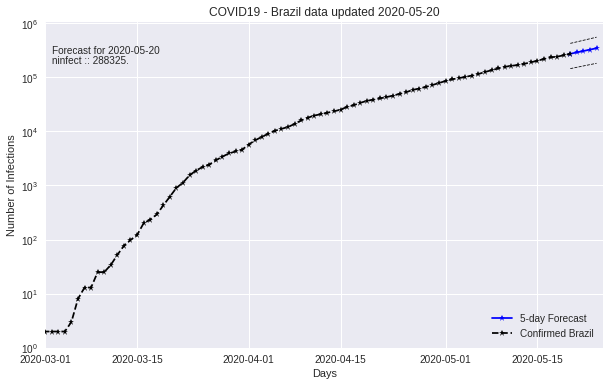

In [8]:
# Graphic Brazil

# Graphic Brazil

# Graphic Brazil
fig = plt.figure(figsize=[10, 6])
ax2 = plt.subplot()

ax2.plot(dateCase[-len(prbrdata):], prbrdata, "b*-", label="5-day Forecast")
ax2.plot(dateCase[-len(prbrdata):], ierro, 'k--', lw=.8)
ax2.plot(dateCase[-len(prbrdata):], serro, 'k--', lw=.8)
ax2.plot(tested.index, tested["total_cases"], "k*--", label="Confirmed Brazil")

ax2.text(pd.to_datetime("2020-03-02"), tested["total_cases"][-1], "Forecast for "+str(datetime.now().date()))
ax2.text(pd.to_datetime("2020-03-02"), tested["total_cases"][-8], "ninfect :: "+str(hojebr)[:7])
# ax2.axvline(today,ls="dotted",lw=1.8)

ax2.set_title("COVID19 - Brazil data updated "+str(tested["date"][tested.index[-1]]))
ax2.set_xlabel("Days")
ax2.set_ylabel("Number of Infections")
ax2.set_xlim(pd.to_datetime("2020-03-01"), datetime.now().date()+timedelta(days=5))
ax2.set_yscale('log')
ax2.set_ylim(1,)
ax2.legend(loc="lower right")
ax2.grid(1)
# plt.show()
# fig.savefig("images/log_data_forecast_brazil.png", dpi=350)

In [ ]:
#  Countreis of South America
############################SA##############
############################SA##############
today = datetime.now().date()
sa = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Falkland Islands', 'French Guiana',
      'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']
sa = sorted(sa)
san = total_data[(total_data.location.isin(sa)) & (total_data["total_cases"] > 20.)]
psum = san.groupby('date').total_cases.sum()

############################SA##############

fig = plt.figure(figsize=[10, 6])
ax = plt.subplot()

for ii in sa:
    p = total_data[(total_data["location"] == ii) & (total_data["total_cases"] > 20.)]
    if len(p) > 0:
        ax.plot(p.total_cases.values, label=ii)
        ax.text(len(p), p.total_cases.values.max(), ii)
ax.plot(psum.values, 'g*-', label="Sum South\n America")
ax.text(max(ax.get_xlim()) - 5, psum.values.max(), "Sum SouthAmerica", color="g")
ax.text(max(ax.get_xlim()) - 15, 1, 'update on ' + str(datetime.now().date()))
ax.set_yscale('log')
ax.set_title("Countries of South America")
ax.set_ylabel("Number of Infections")
ax.set_xlim(0, max(ax.get_xlim()) + 15)
ax.set_xlabel('Days after the day with over 20 cases confirmeds')
plt.legend(loc=5)
# plt.show()
fig.savefig("images/southAmerica_brazil.png", dpi=350)
plt.close()

############################ Countries bordering of Brazil ############################
############################ Countries bordering of Brazil ############################
############################ Countries bordering of Brazil ############################

borderBR = ['Argentina', 'Bolivia', 'Brazil', 'Colombia', 'French Guiana', 'Guyana', 'Paraguay', 'Peru', 'Suriname']
borderBR = sorted(borderBR)

# psum.values
############################
fig = plt.figure(figsize=[10, 6])
ax = plt.subplot()

for ii in borderBR:
    p = total_data[(total_data["location"] == ii) & (total_data["total_cases"] > 20.)]
    if len(p) > 0:
        ax.plot(p.total_cases.values, label=ii)
        ax.text(len(p), p.total_cases.max(), ii)

ax.text(max(ax.get_xlim()) - 5, 20, 'update on ' + str(today))
ax.set_yscale('log')
ax.set_title("Countries bordering of Brazil")
ax.set_ylabel("Number of Infections")
ax.set_xlim(0, max(ax.get_xlim()) + 15)
ax.set_xlabel('Days after the day with over 20 cases confirmeds')
plt.legend(loc=5)
# plt.show()
fig.savefig("images/border_brazil.png", dpi=350)
plt.close()

################# world############################ world###########
################# world############################ world###########

top = total_data.sort_values('total_cases', ascending=False).where(
    total_data.location != 'World').dropna().location.unique()[:4]
top = list(top)
top.append("Brazil")

################# world############################ world###########
################# world############################ world###########

fig = plt.figure(figsize=[10, 6])
ax = plt.subplot()

for ii in top:
    if ii == "Brazil":
        p = total_data[(total_data["location"] == ii) & (total_data["total_cases"] > 100.)]
    #         p['total_cases'] = p['total_cases'].add(10.)
    else:
        p = total_data[(total_data["location"] == ii) & (total_data["total_cases"] > 100.)]

    if len(p) > 0:
        ax.plot(p.total_cases.values, label=ii)
        ax.text(len(p), p.total_cases.max(), ii)

ax.text(max(ax.get_xlim()) - 15, 100, 'update on ' + str(today))
ax.set_yscale('log')
ax.set_title("Countries of World")
ax.set_ylabel("Number of Infections")
ax.set_xlim(0, max(ax.get_xlim()) + 15)
ax.set_xlabel('Days after the day with over 100 cases confirmeds')
plt.legend(loc=5)
# plt.show()
fig.savefig("images/top_world.png", dpi=350)
plt.close()

# top 5 STATES OF BRAZIL########################
# top 5 STATES OF BRAZIL########################
# top 5 STATES OF BRAZIL########################
url = "https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv"
dados_brazil = pd.read_csv(url, header=0, index_col="date")
############
############
listStates = sorted(dados_brazil["state"].unique())[:-1]
dados_brazil.index = pd.to_datetime(dados_brazil.index)
nna = dados_brazil.loc[:, ["state", "totalCases"]].where(dados_brazil["state"] != 'TOTAL').dropna().sort_values(
    by="totalCases",
    ascending=False)
TOP5 = nna.state.unique()[:5]
########################### TOP 5 ############
############
############
fig = plt.figure(figsize=[10, 6])
ax = plt.subplot()

for ii in TOP5:
    p = dados_brazil[(dados_brazil["state"] == ii) & (dados_brazil["totalCases"] > 26.)]
    if len(p) > 0:
        ax.plot(p.totalCases.values, label=ii)
        ax.text(len(p), p.totalCases.values.max(), ii)
ax.text(max(ax.get_xlim()) - 10, 50, 'update on ' + str(datetime.now().date()))
ax.set_yscale('log')
ax.set_title("5 States of Brazil")
ax.set_ylabel("Number of Infections")
ax.set_xlim(0, max(ax.get_xlim()) + 15)
ax.set_xlabel('Days after the day with over 20 cases confirmeds')
plt.legend(loc=5)
plt.grid("both")
fig.savefig("images/n20cases_TOP5.png", dpi=350)
plt.close()

In [13]:
##########################################################################################
##########################################################################################
# Gráfico interativo com a taxa de infectados, mortos por Estado
# dados > arquivo CSV
# url - variável armazena o endereço web do arquivo utilizado
# Desenvolvedor: Frederico Gustavo Magalhães - Data: 18/05/2020

# ax = plt.subplot()
data = pd.read_csv("https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv")
datos = pd.DataFrame(data)
datos.head()

,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants
0,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
1,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,0,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
2,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
3,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,1,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
4,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN


In [38]:
estado = "SP"
ndatos = datos[datos.state == estado]

In [42]:
figura = go.Figure()
# ndatos['date'] = pd.to_datetime(ndatos['date'])
if estado == "TOTAL": estado = "Brasil"
# Linha com os novos casos de infectados
figura.add_trace(go.Scatter(x=ndatos.date,
                            y=ndatos.newCases,
                            mode='lines+markers',
                            name='Novos Casos '+estado))

# Linha com os novos casos de morte
figura.add_trace(go.Scatter(x=ndatos.date,
                            y=ndatos.newDeaths,
                            mode='lines+markers',
                            name='Novas Mortes '+estado))
# salva como figura estatica
fig.savefig("./images/number-new-cases.png", dpi=1500)
# salva como html com interação..
# figura.write_html('./images/newCases_tst.html')
figura.show()

In [57]:
# Gráfico interativo com a taxa de infectados, mortos por Estado
# dados > arquivo CSV
# url - variável armazena o endereço web do arquivo utilizado
# Desenvolvedor: Frederico Gustavo Magalhães - Data: 19/05/2020


# criar um gráfico interativo com o Plotly
fig = go.Figure(
    data=[
          go.Bar(
              x=ndatos['date'],
              y=ndatos['totalCases_per_100k_inhabitants'],
              )
          ]
    )

fig.update_layout(
    title='Evolution the COVID-19 for 100k inhabitants in '+estado,
    yaxis_title='N Infections',
    shapes = [dict(
        x0='2020-03-01', x1='2020-03-01', y0=0, y1=1, xref='x', yref='paper',
        line_width=2)],
    annotations=[dict(
        x='2020-03-01', y=0.05, xref='x', yref='paper',
        showarrow=False, xanchor='left', text='beginning of period')]
)

# fig.savefig("images/evolution-case-100k-inhabitants.png", dpi=1500)
fig.show()

In [67]:
# criar um gráfico interativo com o Plotly

fig2 = go.Figure(
    data=[
          go.Bar(
              x=ndatos['date'],
              y=ndatos['deaths']
              )
          ]
    )

fig2.update_layout(
    title='Evolution of total deaths of COVID-19'+estado,
    yaxis_title='Deaths',
    shapes=[dict(
        x0='2020-03-01', x1='2020-03-01', y0=0, y1=1, xref='x', yref='paper',
        line_width=2)],
    annotations=[dict(
        x='2020-03-01', y=0.05, xref='x', yref='paper',
        showarrow=False, xanchor='left', text='beginning of period')]
)

# fig.savefig("images/evolution-COVID-19.png", dpi=1500)
fig2.show()